# Concurrently-
At the same time, or Simultaneously

# Concurrency VS Parallelism-
In concurrent systems, multiple actions can be in progress (may not be executed)
at the same time. Meanwhile, multiple actions are simultaneously executed in parallel systems. 

# Running it Synchronously

In [7]:
%%time
import time

def do_something():
    print('Sleeping 1 second...')
    time.sleep(1)
    print('Done Sleeping')
    
    
do_something()
do_something()

Sleeping 1 second...
Done Sleeping
Sleeping 1 second...
Done Sleeping
Wall time: 2.01 s


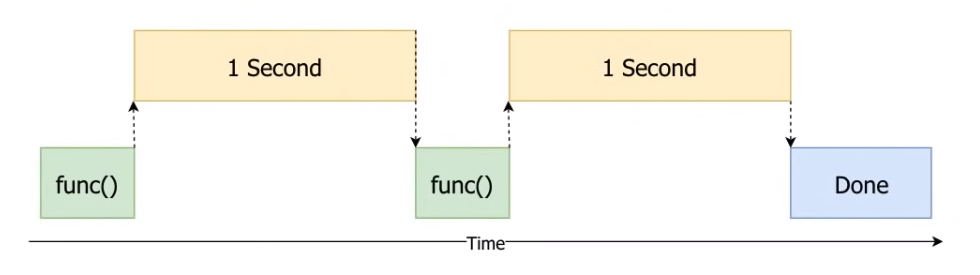

# Running it Concurrently

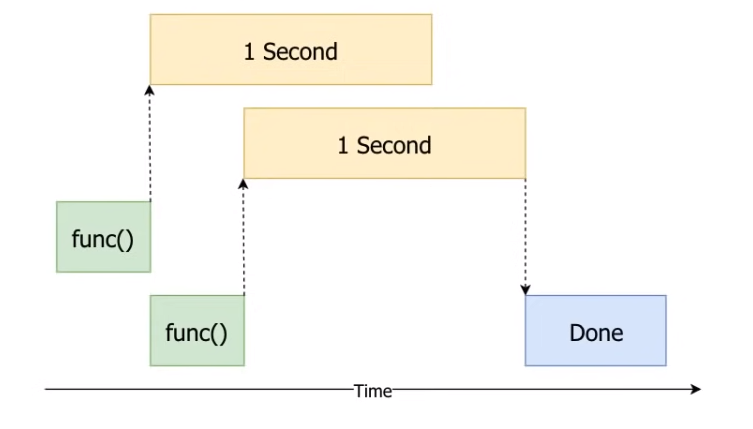

In [8]:
%%time
import time
import threading

def do_something():
    print('Sleeping 1 second...')
    time.sleep(1)
    print('Done Sleeping')
    
# Creating thread objects...not actually running that function
t1 = threading.Thread(target= do_something)
t2 = threading.Thread(target= do_something)

t1.start()
t2.start()

Sleeping 1 second...
Sleeping 1 second...
Wall time: 5.44 ms
Done SleepingDone Sleeping



## What if we wanted our threads to finish before we calculated the execution time...?

#### We use the join() method

In [10]:
%%time
import time
import threading

def do_something():
    print('Sleeping 1 second...')
    time.sleep(1)
    print('Done Sleeping')
    
# Creating thread objects...not actually running that function
t1 = threading.Thread(target= do_something)
t2 = threading.Thread(target= do_something)

t1.start()
t2.start()

t1.join()  # waiting for complete execution...
t2.join()

Sleeping 1 second...
Sleeping 1 second...
Done SleepingDone Sleeping

Wall time: 1.02 s


## Running 10 threads...Concurrently

In [12]:
%%time
import time
import threading

def do_something():
    print('Sleeping 1 second...')
    time.sleep(1)
    print('Done Sleeping')
    

# To join the list of threads...
threads = []

for _ in range(10):
    t = threading.Thread(target= do_something)
    t.start()
    threads.append(t)

    
for thread in threads:
    thread.join()

Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...Sleeping 1 second...

Sleeping 1 second...
Sleeping 1 second...
Sleeping 1 second...
Done SleepingDone SleepingDone SleepingDone Sleeping

Done Sleeping


Done SleepingDone SleepingDone Sleeping
Done Sleeping
Done Sleeping


Wall time: 1.04 s


## Adding arguments to the function

In [20]:
%%time
import time
import threading

def do_something(seconds):
    print(f'Sleeping {seconds} second(s)...')
    time.sleep(seconds)
    print('Done Sleeping')
    

# To join the list of threads...
threads = []

for _ in range(10):
    t = threading.Thread(target= do_something, args=[1.5])
    t.start()
    threads.append(t)

    
for thread in threads:
    thread.join()

Sleeping 1.5 second(s)...
Sleeping 1.5 second(s)...
Sleeping 1.5 second(s)...
Sleeping 1.5 second(s)...
Sleeping 1.5 second(s)...
Sleeping 1.5 second(s)...
Sleeping 1.5 second(s)...
Sleeping 1.5 second(s)...
Sleeping 1.5 second(s)...
Sleeping 1.5 second(s)...
Done Sleeping
Done SleepingDone SleepingDone SleepingDone Sleeping



Done SleepingDone SleepingDone Sleeping

Done SleepingDone Sleeping


Wall time: 1.54 s


# Concurrent execution using ThreadPoolExecutor

In [21]:
%%time
import time
import concurrent.futures   # Best to use this with a context manager


def do_something(seconds):
    print(f'Sleeping {seconds} second(s)...')
    time.sleep(seconds)
    return 'Done Sleeping'


with concurrent.futures.ThreadPoolExecutor() as executor:
    # If we want to execute the function once at a time, use the submit() method.
    # Submit method schedules a function to be executed and returns a future object.
    f1 = executor.submit(do_something, 1)
    
    # To print the return value, use the result method
    print(f1.result())    # If we run the result method, it will wait around until the function completes
    
    # Even if we dont use the result method, its going to join all the threads and let them
    # finish after the context manager ends...

Sleeping 1 second(s)...
Done Sleeping
Wall time: 1.02 s


### Running it multiple times

In [32]:
%%time
import time
import concurrent.futures   # Best to use this with a context manager


def do_something(seconds):
    print(f'Sleeping {seconds} second(s)...')
    time.sleep(seconds)
    return f'Done Sleeping for {seconds}'


with concurrent.futures.ThreadPoolExecutor() as executor:

    f1 = executor.submit(do_something, 2)
    f2 = executor.submit(do_something, 1)
    
    print(f1.result())  
    print(f2.result())

Sleeping 2 second(s)...
Sleeping 1 second(s)...
Wall time: 2.01 s


### Running it 10 times

In [39]:
%%time
import time
import concurrent.futures   # Best to use this with a context manager


def do_something(seconds):
    print(f'Sleeping {seconds} second(s)...')
    time.sleep(seconds)
    return f'Done Sleeping for {seconds}'


with concurrent.futures.ThreadPoolExecutor() as executor:
    
    seconds = [15,2,16,18,19,10,23,12,11]

    results = [executor.submit(do_something, sec) for sec in seconds]
    
    # using the as_completed method, which gives an iterator for us to loop over, that will yield the results
    # of our threads as they are completed...
    for f in concurrent.futures.as_completed(results):
        print(f.result())  # prints out results in the order they were completed

    

Sleeping 15 second(s)...
Sleeping 2 second(s)...
Sleeping 16 second(s)...
Sleeping 18 second(s)...
Sleeping 19 second(s)...
Sleeping 10 second(s)...
Sleeping 23 second(s)...
Sleeping 12 second(s)...
Sleeping 11 second(s)...
Done Sleeping for 2
Done Sleeping for 10
Done Sleeping for 11
Done Sleeping for 12
Done Sleeping for 15
Done Sleeping for 16
Done Sleeping for 18
Done Sleeping for 19
Done Sleeping for 23
Wall time: 23 s


### Returning the results in the order that they were started...

In [41]:
%%time
import time
import concurrent.futures   # Best to use this with a context manager


def do_something(seconds):
    print(f'Sleeping {seconds} second(s)...')
    time.sleep(seconds)
    return f'Done Sleeping for {seconds}'


with concurrent.futures.ThreadPoolExecutor() as executor:
    
    seconds = [15,2,16,18,19,10,23,12,11]

    results = executor.map(do_something, seconds)
    
    for result in results:
        print(result) # prints out results in the order they were started

Sleeping 15 second(s)...
Sleeping 2 second(s)...
Sleeping 16 second(s)...
Sleeping 18 second(s)...
Sleeping 19 second(s)...
Sleeping 10 second(s)...
Sleeping 23 second(s)...
Sleeping 12 second(s)...
Sleeping 11 second(s)...
Done Sleeping for 15
Done Sleeping for 2
Done Sleeping for 16
Done Sleeping for 18
Done Sleeping for 19
Done Sleeping for 10
Done Sleeping for 23
Done Sleeping for 12
Done Sleeping for 11
Wall time: 23 s


---

# Real-world example 

In [42]:
%%time
import requests
import time
import concurrent.futures

img_urls = [
    'https://images.unsplash.com/photo-1516117172878-fd2c41f4a759',
    'https://images.unsplash.com/photo-1532009324734-20a7a5813719',
    'https://images.unsplash.com/photo-1524429656589-6633a470097c',
    'https://images.unsplash.com/photo-1530224264768-7ff8c1789d79',
    'https://images.unsplash.com/photo-1564135624576-c5c88640f235',
    'https://images.unsplash.com/photo-1541698444083-023c97d3f4b6',
    'https://images.unsplash.com/photo-1522364723953-452d3431c267',
    'https://images.unsplash.com/photo-1513938709626-033611b8cc03',
    'https://images.unsplash.com/photo-1507143550189-fed454f93097',
    'https://images.unsplash.com/photo-1493976040374-85c8e12f0c0e',
    'https://images.unsplash.com/photo-1504198453319-5ce911bafcde',
    'https://images.unsplash.com/photo-1530122037265-a5f1f91d3b99',
    'https://images.unsplash.com/photo-1516972810927-80185027ca84',
    'https://images.unsplash.com/photo-1550439062-609e1531270e',
    'https://images.unsplash.com/photo-1549692520-acc6669e2f0c'
]


for img_url in img_urls:
    img_bytes = requests.get(img_url).content
    img_name = img_url.split('/')[3] 
    img_name = f'{img_name}.jpg'
    with open(img_name, 'wb') as img_file:
        img_file.write(img_bytes)
        print(f'{img_name} was downloaded...')
        
        

photo-1516117172878-fd2c41f4a759.jpg was downloaded...
photo-1532009324734-20a7a5813719.jpg was downloaded...
photo-1524429656589-6633a470097c.jpg was downloaded...
photo-1530224264768-7ff8c1789d79.jpg was downloaded...
photo-1564135624576-c5c88640f235.jpg was downloaded...
photo-1541698444083-023c97d3f4b6.jpg was downloaded...
photo-1522364723953-452d3431c267.jpg was downloaded...
photo-1513938709626-033611b8cc03.jpg was downloaded...
photo-1507143550189-fed454f93097.jpg was downloaded...
photo-1493976040374-85c8e12f0c0e.jpg was downloaded...
photo-1504198453319-5ce911bafcde.jpg was downloaded...
photo-1530122037265-a5f1f91d3b99.jpg was downloaded...
photo-1516972810927-80185027ca84.jpg was downloaded...
photo-1550439062-609e1531270e.jpg was downloaded...
photo-1549692520-acc6669e2f0c.jpg was downloaded...
Wall time: 2min 17s
Parser   : 188 ms


# With concurrency

In [ ]:
%%time
import time
import requests
import concurrent.futures

img_urls = [
    'https://images.unsplash.com/photo-1516117172878-fd2c41f4a759',
    'https://images.unsplash.com/photo-1532009324734-20a7a5813719',
    'https://images.unsplash.com/photo-1524429656589-6633a470097c',
    'https://images.unsplash.com/photo-1530224264768-7ff8c1789d79',
    'https://images.unsplash.com/photo-1564135624576-c5c88640f235',
    'https://images.unsplash.com/photo-1541698444083-023c97d3f4b6',
    'https://images.unsplash.com/photo-1522364723953-452d3431c267',
    'https://images.unsplash.com/photo-1513938709626-033611b8cc03',
    'https://images.unsplash.com/photo-1507143550189-fed454f93097',
    'https://images.unsplash.com/photo-1493976040374-85c8e12f0c0e',
    'https://images.unsplash.com/photo-1504198453319-5ce911bafcde',
    'https://images.unsplash.com/photo-1530122037265-a5f1f91d3b99',
    'https://images.unsplash.com/photo-1516972810927-80185027ca84',
    'https://images.unsplash.com/photo-1550439062-609e1531270e',
    'https://images.unsplash.com/photo-1549692520-acc6669e2f0c'
]


def download_image(img_url):
    img_bytes = requests.get(img_url).content
    img_name = img_url.split('/')[3] 
    img_name = f'{img_name}.jpg'
    with open(img_name, 'wb') as img_file:
        img_file.write(img_bytes)
        print(f'{img_name} was downloaded...')
        
with concurrent.futures.ThreadPoolExecutor() as executor:
    executor.map(download_image, img_urls)

---